In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
res_raw = pd.read_csv('res_raw.csv')
res_grouped = pd.read_csv('res_grouped.csv')

In [3]:
def create_label(row):
    if row['forest_seed']:
        forest = 'f-' # low variance
    else:
        forest = 'f+' # high variance
        
    if row['shuffle']:
        cv = 'cv+' # high variance
    else:
        cv = 'cv-' # low variance
    
    return '  '.join([forest, cv])

In [4]:
res_grouped['settings'] = res_grouped.apply(lambda row: create_label(row), axis=1)
res_grouped.head(1)

,data_noise,forest_name,forest_seed,shuffle,std(mean),std(std),settings
0,0.4,forest_hyperparams_0,False,False,0.010831,0.012195,f+ cv-


In [5]:
res_grouped = res_grouped.set_index('settings')

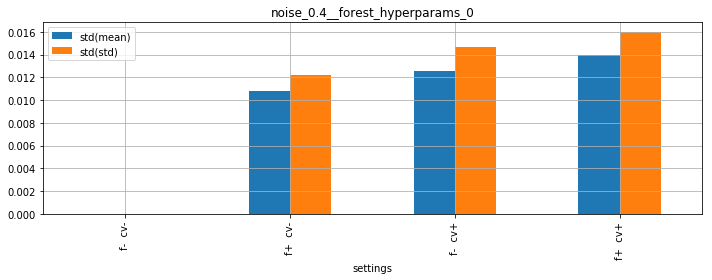

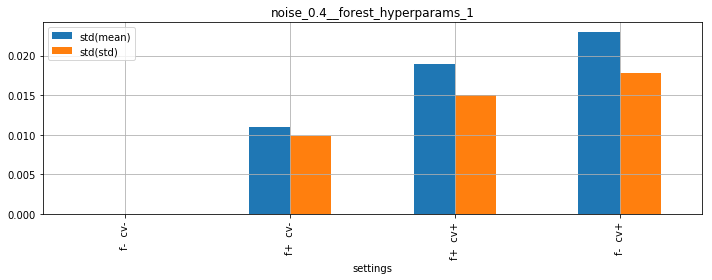

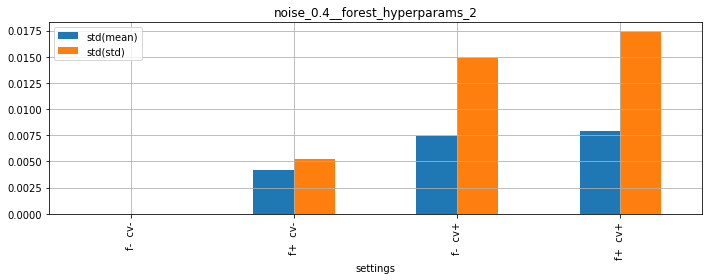

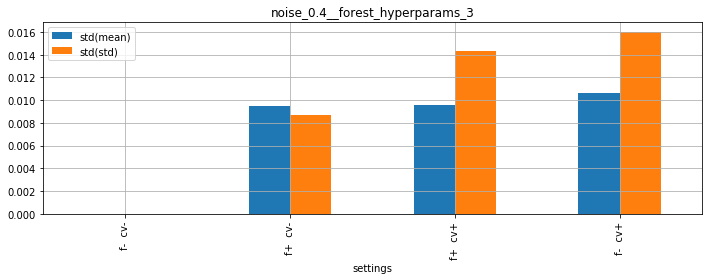

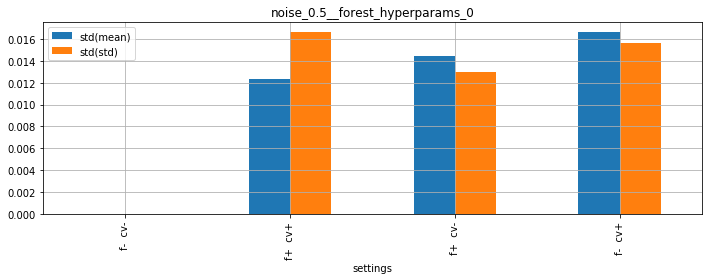

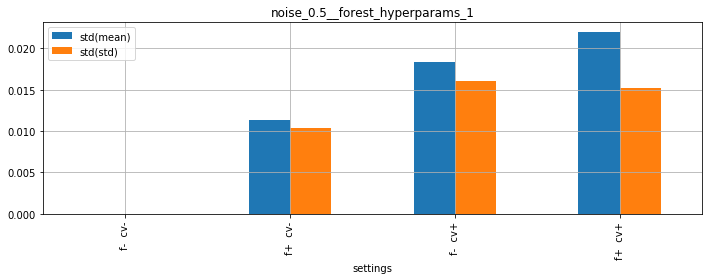

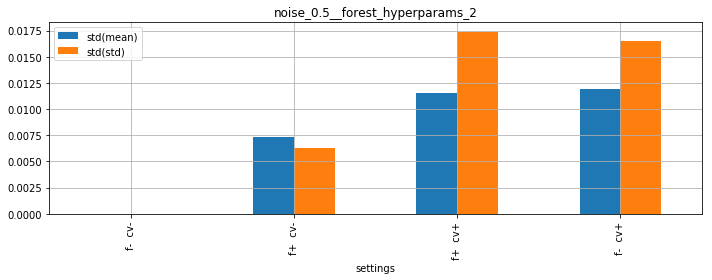

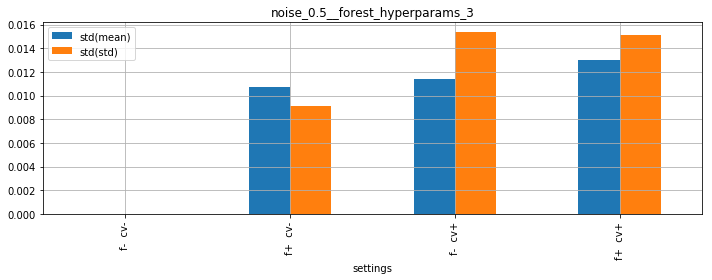

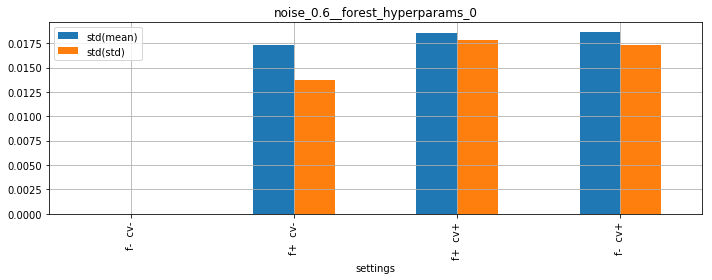

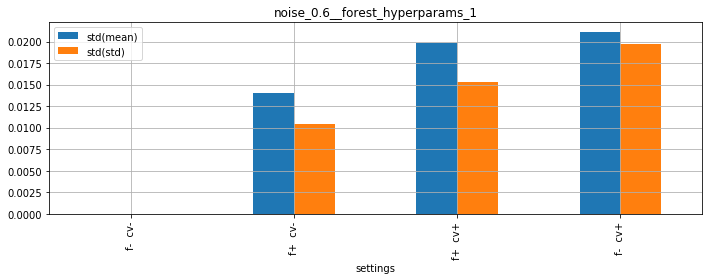

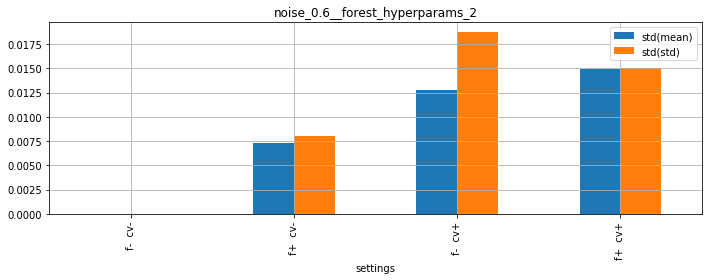

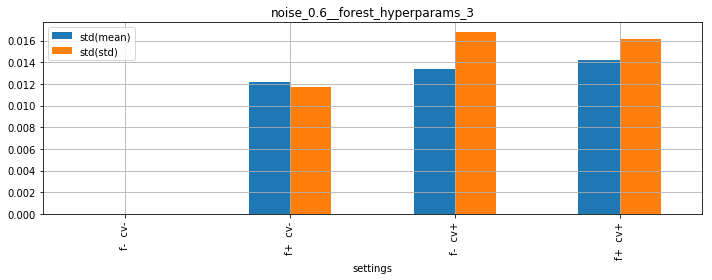

In [8]:
for gr_index, group_df in res_grouped.groupby(by=['data_noise', 'forest_name']):
    group_df = group_df.sort_values(by='std(mean)')
    
    fig, ax = plt.subplots()

    group_df[['std(mean)', 'std(std)']].plot.bar(ax=ax, grid=True)

    fig.set_size_inches(10, 4)

    title = 'noise_%s__%s' % (str(gr_index[0]), gr_index[1])
    plt.title(title)
    
    plt.tight_layout()
    
    plt.savefig(title + '.png')
    plt.show()

    plt.gcf().clear()
    mpl.pyplot.close("all")